In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
        # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

1. Setup and load data

1.1. Install dependencies and set them up

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
# !pip install tensorflow opencv-python matplotlib

In [5]:
# !pip list

In [6]:
# pip show tensorflow

In [7]:
import tensorflow as tf
import os  # os used to navigate through file structure
from matplotlib import pyplot as plt

In [8]:
# why you would use os
# DON'T run this
# os.path.join('data', 'happy') # return a file str that is homogenous no matter the operating system
# os.listdir('data') # list what is in that folder

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [10]:
gpus

[]

In [11]:
len(gpus)

0

In [12]:
# limit tensorflow using all the vrm on our gpu
# by default when you load tf or data, it's going to expand and use all the potential vram which is available on the machine
# the next line prevent that
# avoid oom errors by setting GPU Memory Consumption Growth (out of memory error)
gpus = tf.config.experimental.list_physical_devices('GPU') # grab all the gpus available on our machine
for gpu in gpus: # limit the memory growth
    # loop through every potential gpu and tell tf to keep the memory to what you absolutely need
    tf.config.experimental.set_memory_growth(gpu, True)

1.2. Remove dodgy images / corrupt images

In [13]:
# clean the working space before computation
import shutil
# directory_to_delete = '/kaggle/working/resized'
directory_to_delete = '/kaggle/working/organized'
try:
    shutil.rmtree(directory_to_delete)
    print(f"Directory '{directory_to_delete}' deleted successfully.")
except FileNotFoundError:
    print(f"Directory '{directory_to_delete}' not found.")
except Exception as e:
    print(f"Error deleting directory {e}.")

Directory '/kaggle/working/organized' not found.


In [13]:
# put the images with 0 in a bundle, with 1 in anothe and with 2 in another
import cv2 # computer vision module
import imghdr # allow to check for file extension for particular images

In [14]:
data_dir = '/kaggle/working/organized'

In [15]:
image_extensions = ['jpeg', 'jpg', 'bmp', 'png']

In [16]:
image_extensions[0]

'jpeg'

In [17]:
import os
import cv2

# path to your dataset directory
dataset_path = "/kaggle/input/skin-burn-dataset"

# initialize variables to store the smallest dimensions
min_height, min_width = float('inf'), float('inf')

# iterate through all images in the dataset directory
for file in os.listdir(dataset_path):
    if file.endswith(('.jpg', '.jpeg', '.png')):  # check for valid image extensions
        image_path = os.path.join(dataset_path, file)
        
        # load the image
        img = cv2.imread(image_path)
        if img is not None:
            h, w, _ = img.shape  # get image dimensions
            if h < min_height:
                min_height = h
            if w < min_width:
                min_width = w

print(f"Smallest Image Dimensions: Height = {min_height}, Width = {min_width}")


Smallest Image Dimensions: Height = 111, Width = 153


In [18]:
# create the organized directory with subfolders (0, 1, 2), while handling the cases where:
# An image has a corresponding label but the image itself doesn't exist.
# An image exists but has no label file.

import os
import shutil

# Paths
dataset_path = "/kaggle/input/skin-burn-dataset"  # Path to the dataset with images and YOLO txt files
organized_dir = "/kaggle/working/organized"  # Path to save the organized dataset

# Classes in YOLO format
classes = [0, 1, 2]

# Step 1: Clean and recreate the organized directory
if os.path.exists(organized_dir):
    shutil.rmtree(organized_dir)  # Delete the existing folder and its contents
os.makedirs(organized_dir)

# Create subfolders for each class
for cls in classes:
    os.makedirs(os.path.join(organized_dir, str(cls)), exist_ok=True)

# Step 2: Organize images into subfolders
for file in os.listdir(dataset_path):
    if file.endswith(".txt"):  # Process label files
        label_file = os.path.join(dataset_path, file)
        
        # Read the YOLO label file
        with open(label_file, "r") as f:
            lines = f.readlines()
        
        if not lines:
            continue  # Skip empty label files
        
        # Extract the class ID from the first line
        class_id = int(lines[0].split()[0])  # First number is the class ID
        
        if class_id in classes:
            # Find the corresponding image file (assumes .jpg extension)
            image_file = file.replace(".txt", ".jpg")
            image_path = os.path.join(dataset_path, image_file)
            
            # Check if the image file exists
            if os.path.exists(image_path):
                # Copy the image to the corresponding class folder
                dest_path = os.path.join(organized_dir, str(class_id), image_file)
                shutil.copy(image_path, dest_path)
            else:
                print(f"Image not found for label file: {file}")
    
    elif file.endswith((".jpg", ".jpeg", ".png")):  # Process image files without labels
        image_file = os.path.join(dataset_path, file)
        label_file = file.replace(".jpg", ".txt").replace(".jpeg", ".txt").replace(".png", ".txt")
        
        # Check if label file exists
        if not os.path.exists(os.path.join(dataset_path, label_file)):
            # Move image to a folder for unlabeled data or handle as required
            print(f"Label not found for image: {file}")

print(f"Data organized successfully in '{organized_dir}'.")


Image not found for label file: img966.txt
Image not found for label file: img1303.txt
Image not found for label file: img989.txt
Image not found for label file: img1144.txt
Image not found for label file: img776.txt
Image not found for label file: img761.txt
Image not found for label file: img858.txt
Image not found for label file: img742.txt
Image not found for label file: img927.txt
Image not found for label file: img1264.txt
Image not found for label file: img1334.txt
Image not found for label file: img1325.txt
Image not found for label file: img1438.txt
Image not found for label file: img1294.txt
Image not found for label file: img1088.txt
Image not found for label file: img956.txt
Image not found for label file: img1326.txt
Image not found for label file: img925.txt
Image not found for label file: img747.txt
Image not found for label file: img787.txt
Image not found for label file: img897.txt
Image not found for label file: img1273.txt
Image not found for label file: img1071.txt


In [19]:
# resize all images in the organized directory and save them into a resized directory, maintaining the same subfolder structure


import os
import cv2
import shutil

# paths
organized_dir = "/kaggle/working/organized"  # path to the organized dataset
resized_dir = "/kaggle/working/resized"  # path to save resized images

# target dimensions for resizing
target_width = 111
target_height = 153

# step 1: clean and recreate the resized directory
if os.path.exists(resized_dir):
    shutil.rmtree(resized_dir)  # delete the existing folder and its contents
os.makedirs(resized_dir)

# step 2: process each class subfolder in the organized directory
for class_folder in os.listdir(organized_dir):
    source_folder = os.path.join(organized_dir, class_folder)
    if os.path.isdir(source_folder):  # ensure it's a directory
        # create corresponding subfolder in the resized directory
        target_folder = os.path.join(resized_dir, class_folder)
        os.makedirs(target_folder, exist_ok=True)
        
        # step 3: resize images from the source folder
        for file in os.listdir(source_folder):
            if file.endswith(('.jpg', '.jpeg', '.png')):
                source_file = os.path.join(source_folder, file)
                img = cv2.imread(source_file)
                
                if img is not None:
                    # resize the image to the target dimensions
                    resized_img = cv2.resize(img, (target_width, target_height))
                    
                    # save the resized image in the target folder
                    target_file = os.path.join(target_folder, file)
                    cv2.imwrite(target_file, resized_img)
                else:
                    print(f"Failed to load image: {source_file}")

print(f"All images resized to {target_height}x{target_width} and saved in '{resized_dir}' with subfolders matching the original structure.")


All images resized to 153x111 and saved in '/kaggle/working/resized' with subfolders matching the original structure.


In [20]:
# import imghdr
# import cv2

# # define valid image extensions
# image_extensions = ['jpeg', 'jpg', 'png', 'bmp']

# # loop through every photo in the organized directory
# for image_class in os.listdir(output_folder):
#     class_path = os.path.join(output_folder, image_class)
#     for image in os.listdir(class_path):
#         image_path = os.path.join(class_path, image)
#         try:
#             # check if the file can be opened by OpenCV
#             img = cv2.imread(image_path)
#             if img is None:
#                 print(f"Image is invalid: {image_path}")
#                 os.remove(image_path)
#                 continue

#             # check the file extension is valid
#             ext = imghdr.what(image_path)
#             if ext not in image_extensions:
#                 print(f"Invalid file format: {image_path}")
#                 os.remove(image_path)
#         except Exception as e:
#             print(f"Error processing {image_path}: {e}")
#             os.remove(image_path)


In [21]:
# If the labels are in YOLO format, you typically have text files containing annotations where each line specifies the object class, bounding box coordinates, and dimensions (normalized). Since we are categorizing images based on the class (0, 1, 2), we can parse these annotation files to organize the images into respective folders.

# ORGANISE IMAGES with different labels in different folders
# read the .txt files, extract the class id and copy each image to the corresponding folder

import os
import shutil

# define paths
# dataset_path = "/kaggle/working/resized"  # path to the dataset
# output_folder = "/kaggle/working/organized"  # writable directory for the organized dataset

# clean and recreate output directories for each class
# classes = [0, 1, 2]
# for cls in classes:
#     class_folder = os.path.join(output_folder, str(cls))
#     if os.path.exists(class_folder):
#         shutil.rmtree(class_folder)  # delete existing folder and contents
#     os.makedirs(class_folder)  # recreate the folder

# iterate through YOLO label files in the dataset
# for file in os.listdir(dataset_path):
#     if file.endswith(".txt"):  # process only YOLO label files
#         label_file = os.path.join(dataset_path, file)
        
#         # read the YOLO label file
#         with open(label_file, "r") as f:
#             lines = f.readlines()
        
#         if not lines:
#             continue  # skip empty label files
        
#         # extract the class ID from the first line
#         class_id = int(lines[0].split()[0])  # First number is the class ID
        
#         if class_id in classes:
#             # find the corresponding image file (assumes .jpg extension)
#             image_file = file.replace(".txt", ".jpg")
#             image_path = os.path.join(dataset_path, image_file)
            
#             # check if the image file exists
#             if os.path.exists(image_path):
#                 # copy the image to the corresponding class folder
#                 dest_path = os.path.join(output_folder, str(class_id), image_file)
#                 shutil.copy(image_path, dest_path)
#             else:
#                 print(f"Image not found: {image_file}")

# print(f"Images organized successfully! Check the organized dataset in {output_folder}.")

# some images are not found because there is a txt file corresponding to them, but the images are missing

In [22]:
# # count images in each subfolder
# image_counts = {}
# for image_class in os.listdir(output_folder):
#     class_folder = os.path.join(output_folder, image_class)
#     if os.path.isdir(class_folder):  # ensure it's a directory
#         # count the number of images
#         image_count = len([image for image in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, image))])
#         image_counts[image_class] = image_count

# # print the counts
# for image_class, count in image_counts.items():
#     print(f"Class {image_class}: {count} images")


In [23]:
# count the number of images in each subfolder and print the count for each class

import os

output_folder = "/kaggle/working/resized"  # path to the organized dataset

# initialize a dictionary to store the counts
image_counts = {}

# iterate through the subfolders
for image_class in os.listdir(output_folder):
    class_folder = os.path.join(output_folder, image_class)
    if os.path.isdir(class_folder):  # ensure it's a directory
        # count the number of images in the folder
        image_count = len([image for image in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, image))])
        image_counts[image_class] = image_count

# print the counts for each class
for image_class, count in image_counts.items():
    print(f"Class {image_class}: {count} images")


Class 1: 488 images
Class 2: 201 images
Class 0: 532 images


In [24]:
# delete directory created by mistake
# import shutil
# directory_to_delete = '/kaggle/working/kaggle/input'
# try:
#     shutil.rmtree(directory_to_delete)
#     print(f"Directory '{directory_to_delete}' deleted successfully.")
# except FileNotFoundError:
#     print(f"Directory '{directory_to_delete}' not found.")
# except Exception as e:
#     print(f"Error deleting directory {e}.")

In [25]:
os.listdir(data_dir) # return the folders from that data directory

['1', '2', '0']

In [26]:
# every image of the 0-labeled photos
# os.listdir(os.path.join(data_dir, '0'))

In [27]:
for image_class in os.listdir(data_dir):
    print(image_class)

1
2
0


In [28]:
# for image_class in os.listdir(data_dir):
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         print(image)

In [29]:
img = cv2.imread(os.path.join('/kaggle/working/resized', '2', 'img1002.jpg'))

In [30]:
type(img)

numpy.ndarray

In [31]:
img.shape # number 3 stands for 3 channels, that means it is a coloured image
# (153, 111, 3)

(153, 111, 3)

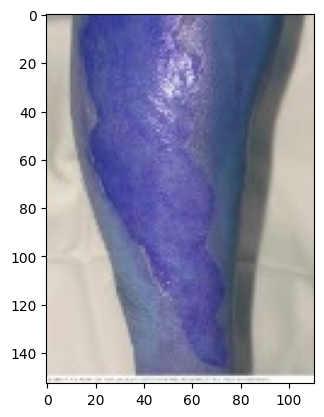

In [32]:
plt.imshow(img)
# open cv reads in an image as bgr and matplotlib expects it to be rgb - this is why it has a weird colour

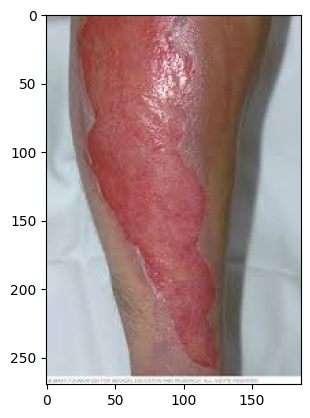

In [33]:
# reorder the channels to fix the colour
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()


img = cv2.imread('/kaggle/working/organized/2/img1002.jpg')  # Replace with a valid image file
if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
else:
    print("Sample image not found.")

In [34]:
# if some images are from the web for eg, we should delete those very small (below 10KB) in size or od weird format

# loop through every photo from the directory
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)): # eg here - we'll have: (organized, 2), then (organized, 1) etc.
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # check if the image may be loaded into open cv
            img = cv2.imread(image_path)
            # check that the images match one of the paths (image_extensions / image ext is valid
            tip = imghdr.what(image_path)
            if tip not in image_extensions:
                print('Image not in extensions list {}'.format(image_path))
                # if above not true, remove the image
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in extensions list /kaggle/working/organized/1/img410.jpg
Image not in extensions list /kaggle/working/organized/1/img1241.jpg
Image not in extensions list /kaggle/working/organized/1/img706.jpg
Image not in extensions list /kaggle/working/organized/2/img277.jpg
Image not in extensions list /kaggle/working/organized/0/img590.jpg
Image not in extensions list /kaggle/working/organized/0/img633.jpg


1.3. Load the data

In [35]:
# tf has a dataset api - it allows you to build a data pipeline and gives a repetitive set of steps and lets you scale out a dataset
# tf.data.Dataset?? # documentation

In [14]:
# tf.data.Dataset.list_files
import numpy as np
from matplotlib import pyplot as plt

In [37]:
# tf.keras.utils.image_dataset_from_directory??
# some notes from docs:
# image_size=(256, 256),
# shuffle=True,
# validation_split=None, # you can also create a validation split
# => this is a very useful helper if you're building image classification models

Building a data pipeline, allowing us to access the data pipeline:

When I resized the images to 111x153, some information (fine details, patterns, etc.) might already have been lost.
Resizing these smaller images back up to 256x256 won't restore that lost information. Instead, it will simply stretch the images, potentially introducing pixelation or artifacts.
I assumed this potential loss. 

In [15]:
data = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/slive/Downloads/archive (5)/organised",
    labels='inferred',
    label_mode='int',
    # image_size=(256, 256),  # resize all images to 256x256////
    batch_size=32,
    shuffle=True
) # this builds an image dataset for you on the fly
# so you don't need to build the labels and actually build the classes 
# the function will do a bunch of preprocessing for you out of the box
# it will resize your images as well
# keras has a pipeline/direct function or helper built into it as well, as above

Found 1221 files belonging to 5 classes.


In [39]:
# data[0]
# this gives an error bcs this isn't a dataset which is pre-loaded into memory already
# it is actually a generator
# so on the fly we need to grab the data that we want - the easiest way to do that is to convert it to a numpy iterator

In [40]:
# tf.keras.utils.image_dataset_from_directory('data', batch_size=8, image_size=(128, 128))
# for eg. if you don't have as much vram on your gpu you could drop the batch size like above

In [16]:
from collections import Counter

# count the sample per class since imbalanced datasets may cause poor model performance
class_counts = Counter()
for batch in data.as_numpy_iterator():
    labels = batch[1]
    class_counts.update(labels)

print(f"Class distribution: {class_counts}")


Class distribution: Counter({np.int32(0): 532, np.int32(1): 488, np.int32(2): 201})


Accessing the data pipeline itself, allowing to loop through it:

In [17]:
data_iterator = data.as_numpy_iterator()
# this allows access to the generator from our data pipeline
# and we can get consecutive batches .next() method

In [18]:
data_iterator
# we can see it is an iterator, also like a generator so we can loop through 
# and continuously pull data batches back
# good to know when working on massive amounts of data

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000029137C3ADE0>)

Grabbing one batch back:

In [19]:
# GET ANOTHER BATCH FROM THE ITERATOR
batch = data_iterator.next()

In [20]:
# batch[0]

In [21]:
len(batch)
# there are 2 parts of this dataset: the images and the labels
# the first part = the image representation = our images from our directory 
# loaded into memory as a set of numpy arrays

2

In [22]:
# images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [23]:
# class 0 = first degree burn
# class 1 = 2nd degree burn
# class 2 = 3rd degree burn
batch[1] # the labels

array([0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int32)

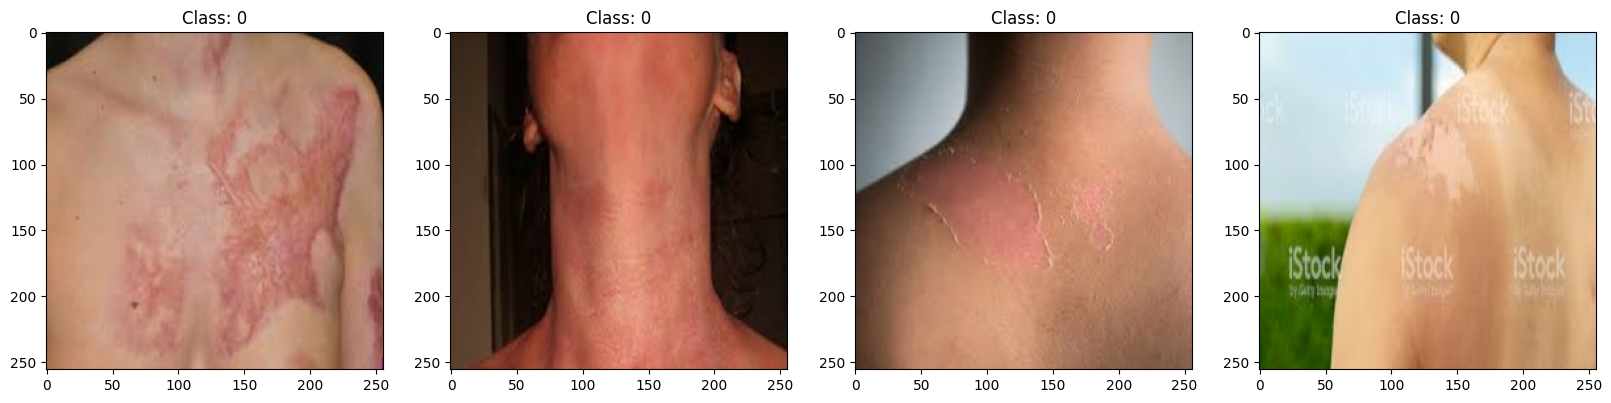

In [24]:
# double check which class is assigned to each type of image
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, (img, label) in enumerate(data.take(4)):
    ax[idx].imshow(img[0].numpy().astype("uint8"))
    ax[idx].set_title(f"Class: {label[0]}")
plt.show()

Notes for next steps:
- for image data we tend to preprocess by scaling the image values between 0 and 1 instead of 1 and 255; this helps our dl model generalize faster and produce better results
- split the data into training, testing and validation partitions to ensure we don't overfit 

In [25]:
#images are in key 0: 
# batch[0]

# #labels are in key 1: 
# batch[1]

In [26]:
batch[0].shape
# so we have 32 images of shape 256 by 256 by 2 channels

(32, 256, 256, 3)

In [27]:
batch[0].min() / 255 # => values between 0 and 1

np.float32(0.0)

In [28]:
batch[0].max()

np.float32(255.0)

When building deep learning models you want your values to be as small as possible; this is going to help you optimize a ton faster 

In [29]:
scaled = batch[0] / 255

In [30]:
scaled.min()

np.float32(0.0)

In [31]:
scaled.max()

np.float32(1.0)

In [32]:
# but we want to scale the data using the data pipeline capability, so do it as we load the data 
# through the data pipeline

2. Preprocess the data

2.1. Scale the data

In [33]:
data = data.map(lambda x, y: (x/255, y))
# map allows to apply a particular type of transformation as our data is being pre-processed through 
# the data pipeline: when we go and pre-fetch data, it's going to do that transformation as well
# => it speeds up how quickly we can access our data from our disk

# x - represents our images bcs those are our independent feature
# y - repr the target variables

https://www.tensorflow.org/api_docs/python/tf/data/Dataset#zip

In [34]:
scaled_iterator = data.as_numpy_iterator()

In [35]:
scaled_iterator.next()[0].max()

np.float32(1.0)

In [36]:
batch = scaled_iterator.next()

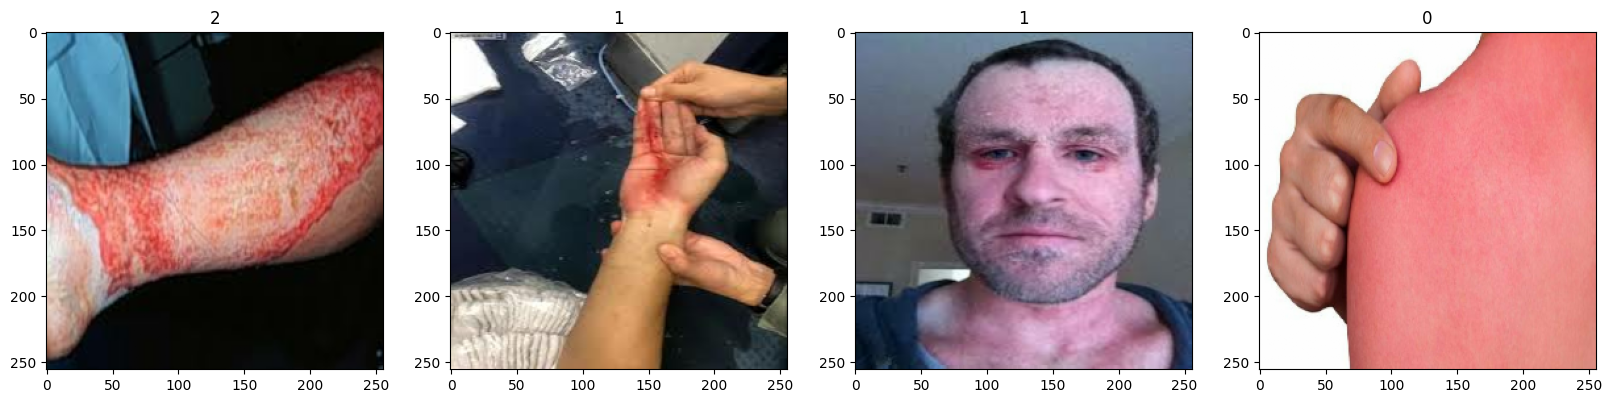

In [37]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

2.2. Split the data

In [38]:
len(data)
# we have 38 batches and each batch is going to have 32 images

39

In [39]:
38*.7

26.599999999999998

In [40]:
38.*.2

7.6000000000000005

In [41]:
38*.1

3.8000000000000003

In [42]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [43]:
train_size

27

In [44]:
val_size

8

In [45]:
test_size

4

In [46]:
train_size+test_size+val_size

39

- training data - what we're training our model on
- validation data - what we're evaluating our model on while we're training (our model didn't necessarily see our validation partition, but we're using it to fine tune how we actually build dl model
- test partition - is not seen by the model until you get to the final evaluation state

In [47]:
# take and skip methods
# take defines how much data we'll take in that particular partition
# our data is already shuffled but if it wasn't then it needed to have been
# suffled before this step
# skip - skips the batches we have already allocated to the training partition
# thus, the test is going to be everything left over

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [48]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
# data_augmentation = tf.keras.Sequential([
#     RandomFlip("horizontal_and_vertical"),
#     RandomRotation(0.2),
#     RandomZoom(0.2)
# ])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(0.1)
])

# apply augmentation only to the training data
train = train.map(lambda x, y: (data_augmentation(x), y))

In [49]:
# import matplotlib.pyplot as plt

# for image, _ in train.take(5):
#     augmented_image = data_augmentation(image)
#     plt.figure()
#     plt.imshow(tf.cast(augmented_image[0], tf.uint8))
#     plt.axis('off')
#     plt.show()


In [50]:
# data augmentation pipeline

# data_augmentation = tf.keras.Sequential([
#     # Flip horizontally and vertically
#     tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    
#     # Random rotation within 20 degrees
#     tf.keras.layers.RandomRotation(0.2),
    
#     # Random zoom in or out by up to 20%
#     tf.keras.layers.RandomZoom(0.2),
    
#     # Random brightness adjustment (range: 10% darker to 10% brighter)
#     tf.keras.layers.RandomBrightness(0.2),
    
#     # Random contrast adjustment (range: 10% lower contrast to 10% higher contrast)
#     tf.keras.layers.RandomContrast(0.2),
    
#     # Randomly crop and resize back to target size to simulate zoom or variability
#     tf.keras.layers.RandomCrop(height=224, width=224),  # Assuming your target size is 224x224
#     tf.keras.layers.Resizing(256, 256)  # Resize back to 256x256
# ])

# # Apply augmentation only to the training data
# train = train.map(lambda x, y: (data_augmentation(x, training=True), y))


In [51]:
# visualize samples by class
# for images, labels in train.take(1):
#     plt.figure(figsize=(10, 10))
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(f"Label: {labels[i]}")
#         plt.axis("off")

# didnt work

In [52]:
# prefetch for better performance (optional but recommended)
# use .prefetch(tf.data.AUTOTUNE) to allow the GPU/CPU to load data in the background during training
train = train.prefetch(tf.data.AUTOTUNE)
val = val.prefetch(tf.data.AUTOTUNE)
test = test.prefetch(tf.data.AUTOTUNE)

In [53]:
len(train)

27

Next step:
- modeling - build the dl model using the keras sequential api

3. Deep model

3.1. Build the deep learning model

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [55]:
# there are 2 model building apis available inside of tensorflow and keras 
# the first one is sequential - great if you got one data input and one data output and the model 'flows' 
# from top to bottom (if you need sth quick and easy)
# the other api: functional - great for multiple inputs, multiple outputs, multiple 
# connections, you need to do a whole bunch of fancy stuff with dl models

# typically when you build a neural network, you're going to form an architecture = many hidden layers which form a deep neural network

In [56]:
# you can also parse through the layers of the sequential class
# model = Sequential()

# 3 convolution blocks
# 1 flatten layer 
# 2 dense layers

# the conv layer has 16 filters -  scans over an image and tries to condense / extract 
# the information inside that image to make an output classification
# the filter is also 3 pixels by 3 pixels in size 
# the stride is 1 - it'll move one pixel each time (sequentially)
# the above are those so called ARCHITECTURAL DECISIONS
# we're applying a relu activation: any output before 0 will be converted to 0 and 
# we will preserve the positive values - this allows taking into account non linear patterns
# a dl model is linear in nature; the power comes from applying the activations

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dropout(0.3))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dropout(0.4))

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(3, activation='softmax'))

# model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [57]:
# 66% accuracy with this 

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization

# model = Sequential()

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dropout(0.3))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dropout(0.4))

# # Use GlobalAveragePooling instead of Flatten
# model.add(GlobalAveragePooling2D())

# # Fully connected layer
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(3, activation='softmax'))

# # model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# lr_schedule = ExponentialDecay(
#     initial_learning_rate=0.001,
#     decay_steps=1000,
#     decay_rate=0.9
# )

# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

In [58]:
# another trial

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalMaxPooling2D, Dropout, BatchNormalization, Flatten
from tensorflow.keras.regularizers import l2

# define the model
model = Sequential()

# block 1
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

# block 2
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))

# block 3
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))

# block 4
model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.5))

# block 5
model.add(Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.5))

# Global MaxPooling instead of Flatten
model.add(GlobalMaxPooling2D())

# fully connected layers
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


C:\Users\slive\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# from tensorflow.keras.optimizers.schedules import ExponentialDecay

# # define the model
# model = Sequential()

# # block 1
# model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(256, 256, 3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# # block 2
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dropout(0.3))

# # block 3
# model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dropout(0.4))

# # block 4 (New Layer for Higher Capacity)
# model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dropout(0.5))

# # GlobalAveragePooling instead of Flatten
# model.add(GlobalAveragePooling2D())

# # fully connected layers
# model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
# model.add(Dropout(0.5))
# model.add(Dense(3, activation='softmax'))

# # define the learning rate schedule
# lr_schedule = ExponentialDecay(
#     initial_learning_rate=0.001,
#     decay_steps=1000,
#     decay_rate=0.9
# )

# # compile the model
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )


In [85]:
# # third trial
# model = Sequential()

# # Block 1
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dropout(0.2))

# # Block 2
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dropout(0.3))

# # Block 3
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dropout(0.4))

# # Block 4
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D())
# model.add(Dropout(0.5))

# # Global pooling
# model.add(GlobalAveragePooling2D())

# # Dense layers
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(3, activation='softmax'))

# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )


In [59]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 512)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,32

 Total params: 1,704,643 (6.50 MB)

 Trainable params: 1,702,659 (6.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [87]:
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.001,
#     decay_steps=1000,
#     decay_rate=0.9
# )
# optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
# model.compile(optimizer=optimizer, loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

3.2. Train

In [60]:
# create a log directory
logdir='logs'

In [61]:
# create a callback - useful if you want to save you model at particular
# checkpoints / do some specific logging
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [62]:
# class_weights = {0: 1.0, 1: 1.0, 2: 1.0}  # Adjust weights based on class distribution
# hist = model.fit(train, epochs=20, validation_data=val, class_weight=class_weights, callbacks=[tensorboard_callback])


In [63]:
total_samples = 1215
num_classes = 3
class_samples = {0: 530, 1: 485, 2: 200}

class_weights = {
    cls: total_samples / (num_classes * count)
    for cls, count in class_samples.items()
}
print(f"Class weights: {class_weights}")


# class weight = total samples / (no. of classes * samples in the class)

Class weights: {0: 0.7641509433962265, 1: 0.8350515463917526, 2: 2.025}


In [64]:
# fit - the training component
# predict - the predictions component

# training data is .. batches of .. images each
# epoch is how long we're training for 
# one epoch = one run over an entire training set of data
# we pass in the validation data as well to see how are model is performing in real time
# the callback says here that we want to log out all of the information from our model 
# to tensorboard so we could open it up inside a tensorboard later on 

# var hist stores all the training information from our training data and our validation data and plot them out in the next step
# hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',        # monitor validation loss
    patience=5,                # stop after 5 epochs of no improvement
    restore_best_weights=True  # restore the weights of the best epoch
)

# add EarlyStopping to the callbacks
hist = model.fit(
    train,
    epochs=50,
    validation_data=val,
    class_weight=class_weights,
    callbacks=[tensorboard_callback]
               # ,early_stopping]  
)

# ideally you want to see the accuracy going up and the loss going down

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.3493 - loss: 10.9193 - val_accuracy: 0.1758 - val_loss: 2.2102
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.3106 - loss: 3.0007 - val_accuracy: 0.4023 - val_loss: 2.0984
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.2854 - loss: 2.9354 - val_accuracy: 0.3945 - val_loss: 2.1545
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.3262 - loss: 2.3091 - val_accuracy: 0.4102 - val_loss: 2.1247
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.2764 - loss: 2.1221 - val_accuracy: 0.3984 - val_loss: 2.0862
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.3895 - loss: 2.1070 - val_accuracy: 0.4219 - val_loss: 2.1511
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 0.3354 - loss: 2.0788 - val_accuracy: 0.3945 - val_loss: 2.1416
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.3583 - loss: 2.0597 - val_accuracy: 0.4414 - val_loss

In [65]:
# hist.history

3.3. Plot performance

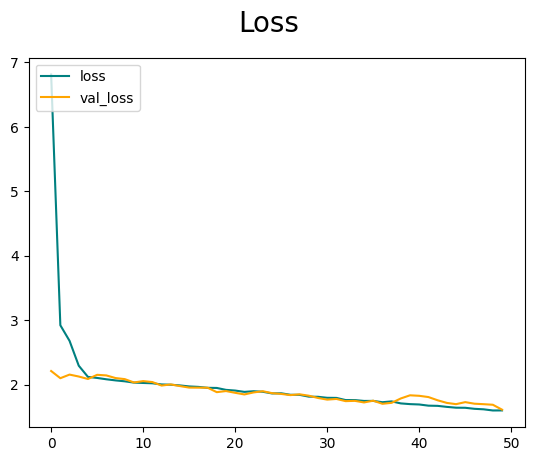

In [66]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# if you see the loss going down and the validation rising up that is an indication
# that the model may be overfitting so it might be time to apply some regularization
# or apply some data o change some data
# if the validation loss starts tearing off it might mean we have a variance problem, 
# so regularization is your friend in that case

# if the graphic is weird we may have a bias problem

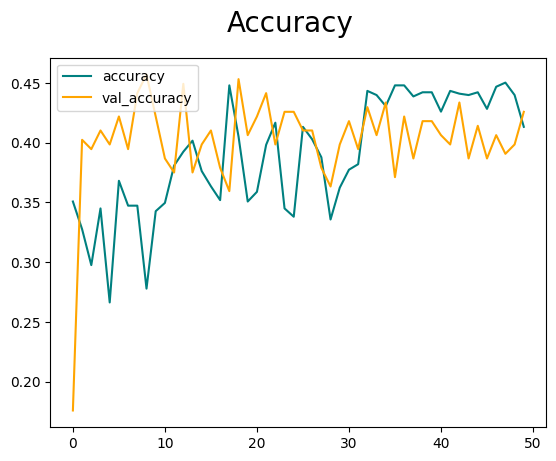

In [67]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

4. Evaluation of performance

In [68]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [69]:
# establish instances of the above metrics
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [70]:
len(test)

4

In [71]:
# for batch in test.as_numpy_iterator(): 
#     X, y = batch # unpack the set of images
#     yhat = model.predict(X) # this returns back a set of values between 0 and 1, bcs of the sigmoid activation
#     pre.update_state(y, yhat) 
#     re.update_state(y, yhat)
#     acc.update_state(y, yhat)


from tensorflow.keras.metrics import Precision, Recall, Accuracy

# initialize metrics
pre = Precision()
re = Recall()
acc = Accuracy()

# evaluate the model on the test set
for batch in test.as_numpy_iterator():
    X, y = batch  # Unpack the batch
    yhat = model.predict(X)  # Get predictions (probabilities)
    yhat_classes = np.argmax(yhat, axis=1)  # Convert to class indices

    # update metrics
    pre.update_state(y, yhat_classes)
    re.update_state(y, yhat_classes)
    acc.update_state(y, yhat_classes)

# print results
print(f"Precision: {pre.result().numpy():.4f}")
print(f"Recall: {re.result().numpy():.4f}")
print(f"Accuracy: {acc.result().numpy():.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
Precision: 0.0000
Recall: 0.0000
Accuracy: 0.3663


In [72]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.0, Recall: 0.0, Accuracy: 0.3663366436958313


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


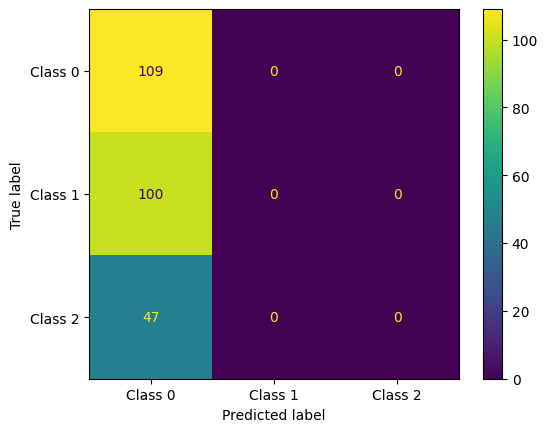

In [73]:
#Debug Learning Progress
#Plot the confusion matrix for the validation set to identify misclassified classes


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true, y_pred = [], []
for images, labels in val:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1', 'Class 2'])
disp.plot()


5. Test

In [74]:
# import cv2

In [75]:
# read in an image that our model has never seen before

# img = cv2.imread('imagine random de test.jpg')
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()

In [76]:
# resize = tf.image.resize(img, (256,256))
# plt.imshow(resize.numpy().astype(int))
# plt.show()

In [77]:
# resize

In [78]:
# np.expand_dims(resize, 0).shape # 0 is the axis I want to apply the extra dimension

In [79]:
# our neural network expects a bunch of images, not just a single image
# so we need to incapsulate it inside of another set of parantheses or arrays 
# or put it inside of a list

# yhat = model.predict(np.expand_dims(resize/255, 0))

In [80]:
# yhat

In [81]:
# if yhat > 0.5: 
#     print(f'Predicted class is Sad')
# else:
#     print(f'Predicted class is Happy')

6. Save the model

In [82]:
from tensorflow.keras.models import load_model

In [83]:
model.save(os.path.join('models','BurntSkinClassifier.h5'))

In [84]:
# new_model = load_model('imageclassifier.h5')
# h5 is a serialization file format

In [85]:
# new_model.predict(np.expand_dims(resize/255, 0))

# Use of pretrained model

Found 1215 files belonging to 3 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 519ms/step - accuracy: 0.4508 - loss: 1.3695 - val_accuracy: 0.5268 - val_loss: 0.9586 - learning_rate: 0.0010
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 421ms/step - accuracy: 0.4851 - loss: 1.0289 - val_accuracy: 0.5580 - val_loss: 0.8803 - learning_rate: 0.0010
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 424ms/step - accuracy: 0.5333 - loss: 0.8987 - val_accuracy: 0.5312 - val_loss: 0.9255 - learning_rate: 0.0010
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 417ms/step - accuracy: 0.5245 - loss: 0.8941 - val_accuracy: 0.5402 - val_loss: 0.9106 - learning_rate: 0.0010
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 411ms/step - accuracy: 0.5227 - loss: 0.8740 - val_accuracy: 0.5491 - val_loss: 0.9055 - learning_rate: 0.0010
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 422ms/step - accuracy: 0.5485 - loss: 0.8713 - val_accuracy: 0.5714 - val_loss: 0.9031 - learning_rate:

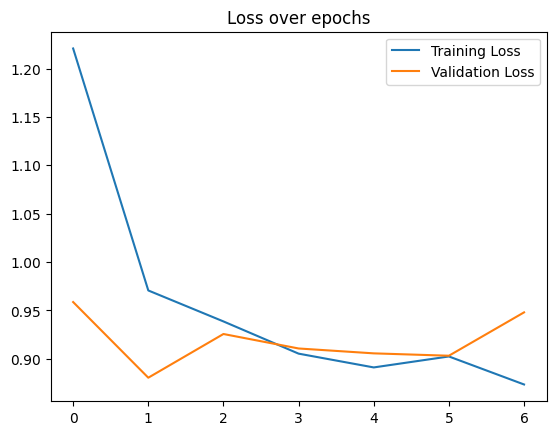

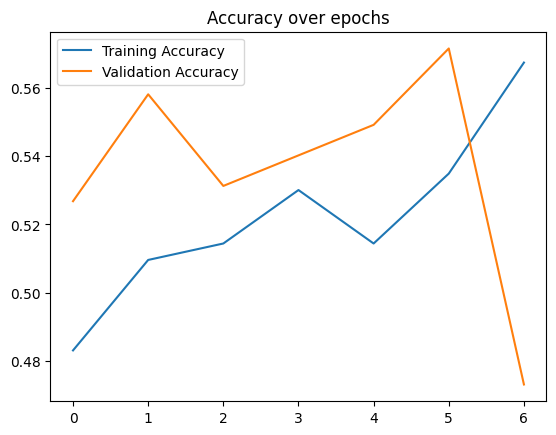

In [114]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# dataset directory
dataset_dir = "/kaggle/working/organized"

# load and preprocess the dataset
data = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    labels='inferred',
    label_mode='int',
    image_size=(224, 224),  # Resize to match MobileNetV2 input
    batch_size=32,
    shuffle=True
)

# split the dataset into train, validation, and test sets
def split_dataset(dataset, train_size=0.7, val_size=0.2):
    total_size = dataset.cardinality().numpy()
    train_dataset = dataset.take(int(total_size * train_size))
    val_test_dataset = dataset.skip(int(total_size * train_size))
    val_dataset = val_test_dataset.take(int(total_size * val_size))
    test_dataset = val_test_dataset.skip(int(total_size * val_size))
    return train_dataset, val_dataset, test_dataset

train, val, test = split_dataset(data)

# prefetch for performance
train = train.prefetch(tf.data.AUTOTUNE)
val = val.prefetch(tf.data.AUTOTUNE)
test = test.prefetch(tf.data.AUTOTUNE)

# data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# add data augmentation to training dataset
train = train.map(lambda x, y: (data_augmentation(x), y))

# load the MobileNetV2 model without the top layer
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global pooling layer
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: first, second, and third-degree burns
])

# compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# callbacks for training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# train the model
history = model.fit(
    train,
    validation_data=val,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)

# evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# plot training history
import matplotlib.pyplot as plt

# plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

# plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


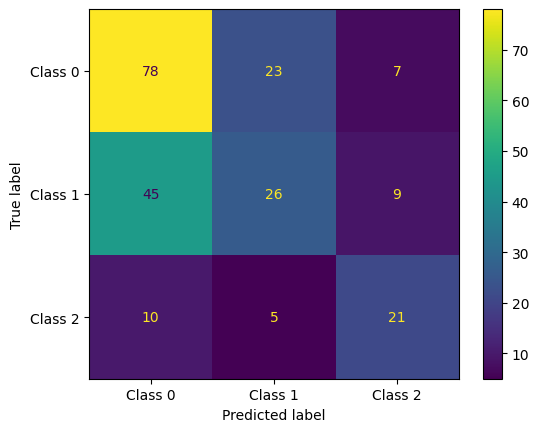

In [115]:
#Debug Learning Progress
#Plot the confusion matrix for the validation set to identify misclassified classes


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true, y_pred = [], []
for images, labels in val:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1', 'Class 2'])
disp.plot()

In [116]:
# initialize metrics
pre = Precision()
re = Recall()
acc = Accuracy()

# evaluate the model on the test set
for batch in test.as_numpy_iterator():
    X, y = batch  # unpack the batch
    yhat = model.predict(X)  # get predictions (probabilities)
    yhat_classes = np.argmax(yhat, axis=1)  # convert to class indices

    # update metrics
    pre.update_state(y, yhat_classes)
    re.update_state(y, yhat_classes)
    acc.update_state(y, yhat_classes)

# print results
print(f"Precision: {pre.result().numpy():.4f}")
print(f"Recall: {re.result().numpy():.4f}")
print(f"Accuracy: {acc.result().numpy():.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Precision: 0.7969
Recall: 0.5368
Accuracy: 0.5089


Found 1221 files belonging to 5 classes.
Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5257 - loss: 0.9698 - val_accuracy: 0.6607 - val_loss: 0.7176 - learning_rate: 0.0010
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 895ms/step - accuracy: 0.6568 - loss: 0.7216 - val_accuracy: 0.7545 - val_loss: 0.6250 - learning_rate: 0.0010
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 922ms/step - accuracy: 0.7384 - loss: 0.5931 - val_accuracy: 0.6786 - val_loss: 0.6766 - learning_rate: 0.0010
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 906ms/step - accuracy: 0.7216 - loss: 0.6210 - val_accuracy: 0.7143 - val_loss: 0.6681 - learning_rate: 0.0010
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 25s 922ms/step - accuracy: 0.7649 - loss: 0.5716 - val_accuracy: 0.7054 - val_loss: 0.6234 - learning_rate: 0.0010
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7636 - loss: 0.5632 - val_accuracy: 0.7366 - val_loss: 0.6265 - learning_rate: 0.0010
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/st

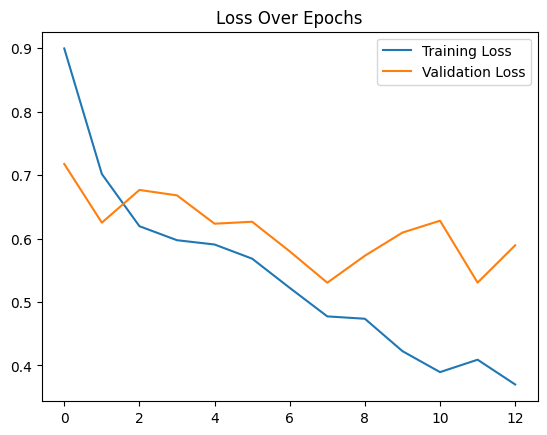

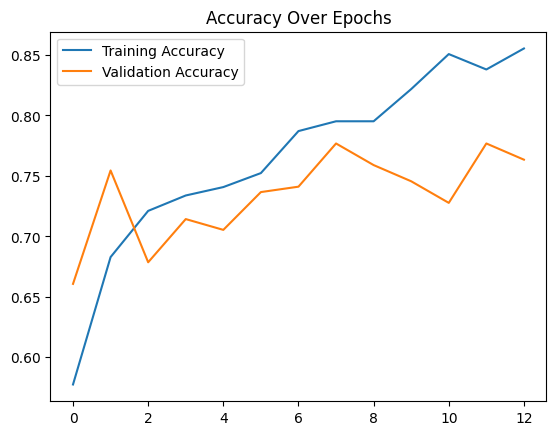

In [87]:
# Transfer Learning Using EfficientNetB0

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# dataset directory
dataset_dir = "C:/Users/slive/Downloads/archive (5)/organised"

# load and preprocess the dataset
data = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    labels='inferred',
    label_mode='int',
    image_size=(224, 224),  # resize to match EfficientNetB0 input
    batch_size=32,
    shuffle=True
)

# split the dataset into train, validation, and test sets
def split_dataset(dataset, train_size=0.7, val_size=0.2):
    total_size = dataset.cardinality().numpy()
    train_dataset = dataset.take(int(total_size * train_size))
    val_test_dataset = dataset.skip(int(total_size * train_size))
    val_dataset = val_test_dataset.take(int(total_size * val_size))
    test_dataset = val_test_dataset.skip(int(total_size * val_size))
    return train_dataset, val_dataset, test_dataset

train, val, test = split_dataset(data)

# prefetch for performance
train = train.prefetch(tf.data.AUTOTUNE)
val = val.prefetch(tf.data.AUTOTUNE)
test = test.prefetch(tf.data.AUTOTUNE)

# data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.1)
])
train = train.map(lambda x, y: (data_augmentation(x), y))

# load the EfficientNetB0 model without the top layer
base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global pooling layer
    Dense(512, activation='relu'),  # Increased dense layer size for better learning
    Dropout(0.5),  # Dropout for regularization
    Dense(3, activation='softmax')  # 3 classes: first, second, and third-degree burns
])

# compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# callbacks for training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# train the model
history = model.fit(
    train,
    validation_data=val,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)

# unfreeze the base model and fine-tune
base_model.trainable = True
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = model.fit(
    train,
    validation_data=val,
    epochs=10,  # Fine-tune for a few more epochs
    callbacks=[early_stopping, reduce_lr]
)

# evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# plot training history
import matplotlib.pyplot as plt

# plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

# plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


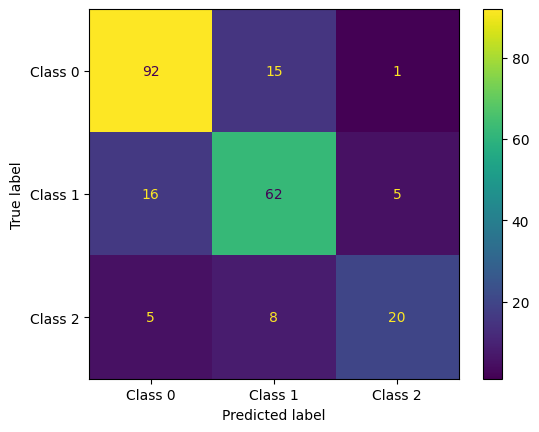

In [88]:
#Debug Learning Progress
#Plot the confusion matrix for the validation set to identify misclassified classes


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true, y_pred = [], []
for images, labels in val:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1', 'Class 2'])
disp.plot()

In [119]:
# initialize metrics
pre = Precision()
re = Recall()
acc = Accuracy()

# evaluate the model on the test set
for batch in test.as_numpy_iterator():
    X, y = batch  # unpack the batch
    yhat = model.predict(X)  # get predictions (probabilities)
    yhat_classes = np.argmax(yhat, axis=1)  # convert to class indices

    # update metrics
    pre.update_state(y, yhat_classes)
    re.update_state(y, yhat_classes)
    acc.update_state(y, yhat_classes)

# print results
print(f"Precision: {pre.result().numpy():.4f}")
print(f"Recall: {re.result().numpy():.4f}")
print(f"Accuracy: {acc.result().numpy():.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Precision: 0.8378
Recall: 0.6596
Accuracy: 0.6165


In [89]:
model.save("efficientnet_burn_classification.h5")
print("Model saved successfully.")


Model saved successfully.


Found 1215 files belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 27s 577ms/step - accuracy: 0.4573 - loss: 2.6548 - val_accuracy: 0.5402 - val_loss: 1.0780 - learning_rate: 0.0010
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 459ms/step - accuracy: 0.5836 - loss: 0.9630 - val_accuracy: 0.6920 - val_loss: 0.6735 - learning_rate: 0.0010
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 462ms/step - accuracy: 0.6167 - loss: 0.7923 - val_accuracy: 0.6250 - val_loss: 0.7357 - learning_rate: 0.0010
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 446ms/step - accuracy: 0.6709 - loss: 0.7541 - val_accuracy: 0.5446 - val_loss: 0.8190 - learning_rate: 0.0010
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 451ms/step - accuracy: 0.6619 - loss: 0.7336 - val_accuracy: 0.5893 - val_loss: 0.8002 - learning_rate: 0.0010
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 464ms/step - accuracy: 0.6985 - loss: 0.7078 - val_accuracy: 0.6786 - val_loss: 0.7223 - learning_rat

I0000 00:00:1735127131.664445      75 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_11', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_23', 36 bytes spill stores, 56 bytes spill loads
ptxas warning : Registers are spilled to local memory in function '__cuda_sm3x_div_rn_noftz_f32_slowpath', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_divide_multiply_subtract_fusion_64', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_divide_multiply_subtract_fusion_52', 4 bytes spill stores, 4 bytes spill loads



26/26 ━━━━━━━━━━━━━━━━━━━━ 71s 583ms/step - accuracy: 0.5163 - loss: 0.9778 - val_accuracy: 0.6339 - val_loss: 0.7859 - learning_rate: 1.0000e-05
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 450ms/step - accuracy: 0.5927 - loss: 0.8741 - val_accuracy: 0.6741 - val_loss: 0.6922 - learning_rate: 1.0000e-05
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 446ms/step - accuracy: 0.6207 - loss: 0.8018 - val_accuracy: 0.6607 - val_loss: 0.7397 - learning_rate: 1.0000e-05
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 463ms/step - accuracy: 0.6615 - loss: 0.7433 - val_accuracy: 0.6562 - val_loss: 0.6586 - learning_rate: 1.0000e-05
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 460ms/step - accuracy: 0.7001 - loss: 0.7090 - val_accuracy: 0.7277 - val_loss: 0.6127 - learning_rate: 1.0000e-05
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 461ms/step - accuracy: 0.6881 - loss: 0.7029 - val_accuracy: 0.6830 - val_loss: 0.6521 - learning_rate: 1.0000e-05
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 468ms/step - accuracy: 0.69

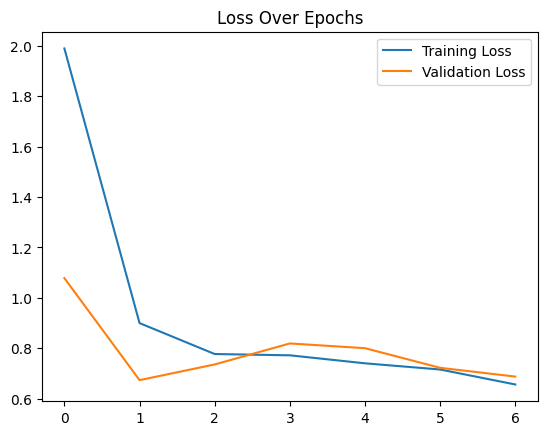

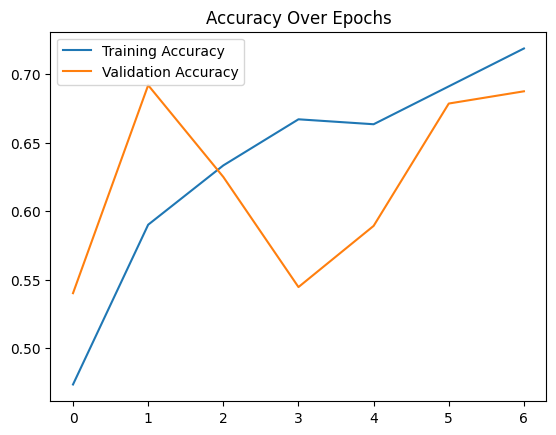

In [120]:
# Transfer Learning Using ResNet50

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# dataset directory
dataset_dir = "/kaggle/working/organized"

# load and preprocess the dataset
data = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    labels='inferred',
    label_mode='int',
    image_size=(224, 224),  # Resize to match ResNet50 input
    batch_size=32,
    shuffle=True
)

# split the dataset into train, validation, and test sets
def split_dataset(dataset, train_size=0.7, val_size=0.2):
    total_size = dataset.cardinality().numpy()
    train_dataset = dataset.take(int(total_size * train_size))
    val_test_dataset = dataset.skip(int(total_size * train_size))
    val_dataset = val_test_dataset.take(int(total_size * val_size))
    test_dataset = val_test_dataset.skip(int(total_size * val_size))
    return train_dataset, val_dataset, test_dataset

train, val, test = split_dataset(data)

# prefetch for performance
train = train.prefetch(tf.data.AUTOTUNE)
val = val.prefetch(tf.data.AUTOTUNE)
test = test.prefetch(tf.data.AUTOTUNE)

# data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.1)
])
train = train.map(lambda x, y: (data_augmentation(x), y))

# load the ResNet50 model without the top layer
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global pooling layer
    Dense(512, activation='relu'),  # Dense layer for feature extraction
    Dropout(0.5),  # Dropout for regularization
    Dense(3, activation='softmax')  # 3 classes: first, second, and third-degree burns
])

# compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# callbacks for training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# train the model
history = model.fit(
    train,
    validation_data=val,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)

# unfreeze the base model and fine-tune
base_model.trainable = True
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = model.fit(
    train,
    validation_data=val,
    epochs=10,  # Fine-tune for a few more epochs
    callbacks=[early_stopping, reduce_lr]
)

# evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# plot training history
import matplotlib.pyplot as plt

# plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

# plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

In [121]:
# initialize metrics
pre = Precision()
re = Recall()
acc = Accuracy()

# evaluate the model on the test set
for batch in test.as_numpy_iterator():
    X, y = batch  # unpack the batch
    yhat = model.predict(X)  # get predictions (probabilities)
    yhat_classes = np.argmax(yhat, axis=1)  # convert to class indices

    # update metrics
    pre.update_state(y, yhat_classes)
    re.update_state(y, yhat_classes)
    acc.update_state(y, yhat_classes)

# print results
print(f"Precision: {pre.result().numpy():.4f}")
print(f"Recall: {re.result().numpy():.4f}")
print(f"Accuracy: {acc.result().numpy():.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Precision: 0.9200
Recall: 0.9020
Accuracy: 0.8181


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


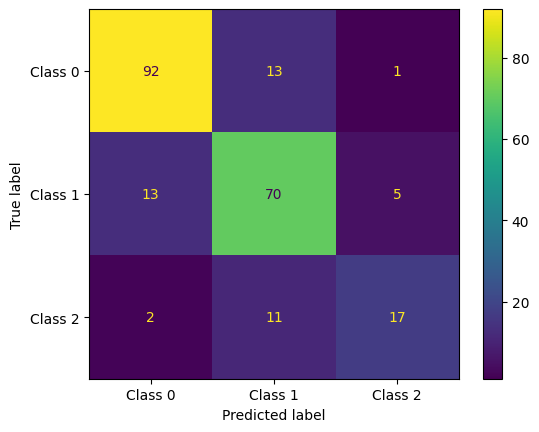

In [122]:
#Debug Learning Progress
#Plot the confusion matrix for the validation set to identify misclassified classes


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true, y_pred = [], []
for images, labels in val:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1', 'Class 2'])
disp.plot()